<a href="https://colab.research.google.com/github/NsiriRoua/Zindi_Mentorship/blob/main/Hack_for_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,  mean_squared_error, f1_score, roc_auc_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hack_for_safety/Train (4).csv")

In [ ]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,Other relative (e.g. in-laws or aunt/uncle) of...,Living together like husband and wife,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,Father/mother/stepfather/stepmother of person 01,Widowed,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [ ]:
train_df.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


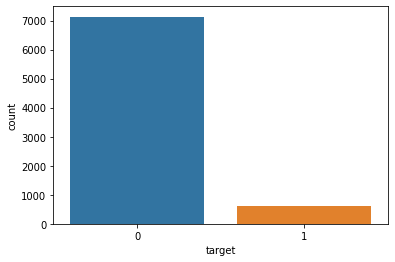

In [ ]:
sns.countplot(train_df["target"])


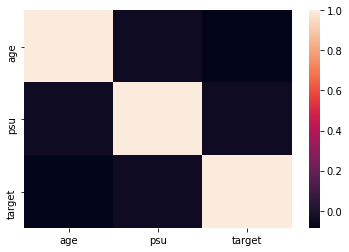

In [ ]:
sns.heatmap(train_df.corr())

In [ ]:
label=LabelEncoder()
train_df['gender'] = label.fit_transform(train_df['gender'])
train_df['race'] = label.fit_transform(train_df['race'])
train_df['dwelling'] = label.fit_transform(train_df['dwelling'])
train_df['dwelling_type'] = label.fit_transform(train_df['dwelling_type'])
train_df['province_code'] = label.fit_transform(train_df['province_code'])
train_df['metro_code'] = label.fit_transform(train_df['metro_code'])
train_df['nationality'] = label.fit_transform(train_df['nationality'])
train_df['RTH'] = label.fit_transform(train_df['RTH'])
train_df['marital_st'] = label.fit_transform(train_df['marital_st'])
train_df['Lang_inside'] = label.fit_transform(train_df['Lang_inside'])
train_df['Lang_outside'] = label.fit_transform(train_df['Lang_outside'])
train_df['Education'] = label.fit_transform(train_df['Education'])
train_df['lw_work'] = label.fit_transform(train_df['lw_work'])
train_df['lw_business'] = label.fit_transform(train_df['lw_business'])
train_df['help_on_household'] = label.fit_transform(train_df['help_on_household'])
train_df['job_or_business'] = label.fit_transform(train_df['job_or_business'])
train_df['nature_of_work'] = label.fit_transform(train_df['nature_of_work'])



In [ ]:
X = train_df.drop(["target", "ID"], axis=1) # feature columns
y = train_df["target"] # the label/target column

In [ ]:
cv=KFold(n_splits=5,shuffle=True,random_state=1)
#Create the model :
s=SVC()
scores=cross_val_score(cls,X,y,cv=cv,scoring='accuracy')
print(scores)

[0.9250646  0.91855204 0.93018746 0.90239173 0.91790562]


In [ ]:

#Evaluate the model :
y_pred=cross_val_predict(cls,X,y,cv=cv)
final_model=cls.fit(X,y)

In [ ]:
# export to 
import sklearn.externals
import joblib

joblib.dump(final_model, 'model.joblib')

['model.joblib']

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hack_for_safety/Test (3).csv')
#Preprocessing 
test_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
0,ID_00241643,Female,23,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Northern Cape,NC - Non Metro,36410104,South Africa,Head/acting head,Single and have never been married/never lived...,Afrikaans,Afrikaans,Grade 10/Standard 8/Form 3,Yes,No,No,Not applicable,Permanent
1,ID_00312043,Female,64,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,97410477,South Africa,Head/acting head,Widowed,Afrikaans,Afrikaans,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable
2,ID_00345323,Female,18,Black African,Unspecified,Unspecified,Eastern Cape,EC - Buffalo City,26011572,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,IsiXhosa,IsiXhosa,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable
3,ID_00369643,Female,19,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87710674,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Xitsonga,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable
4,ID_00381163,Female,24,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87411106,South Africa,Head/acting head,Single and have never been married/never lived...,SiSwati,SiSwati,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable


In [ ]:
# preprocessing
test_df['gender'] = label.fit_transform(test_df['gender'])
test_df['race'] = label.fit_transform(test_df['race'])

# preprocess all the othe columns as well
test_df['dwelling'] = label.fit_transform(test_df['dwelling'])
test_df['dwelling_type'] = label.fit_transform(test_df['dwelling_type'])
test_df['province_code'] = label.fit_transform(test_df['province_code'])
test_df['metro_code'] = label.fit_transform(test_df['metro_code'])
test_df['nationality'] = label.fit_transform(test_df['nationality'])
test_df['RTH'] = label.fit_transform(test_df['RTH'])
test_df['marital_st'] = label.fit_transform(test_df['marital_st'])
test_df['Lang_inside'] = label.fit_transform(test_df['Lang_inside'])
test_df['Lang_outside'] = label.fit_transform(test_df['Lang_outside'])
test_df['Education'] = label.fit_transform(test_df['Education'])
test_df['lw_work'] = label.fit_transform(test_df['lw_work'])
test_df['lw_business'] = label.fit_transform(test_df['lw_business'])
test_df['help_on_household'] = label.fit_transform(test_df['help_on_household'])
test_df['job_or_business'] = label.fit_transform(test_df['job_or_business'])
test_df['nature_of_work'] = label.fit_transform(test_df['nature_of_work'])

In [ ]:
test_ = test_df.drop(["ID"], axis=1)
test_predictions = final_model.predict(test_)
submission_df = pd.DataFrame()
submission_df["ID"] = test_df["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission.csv", index=False)


In [ ]:
score

array([0.92312661, 0.92113769, 0.93148028, 0.90239173, 0.91855204])